<h3> ASSIGINMENT 2 ARTIFICIAL NEURAL NETWORKS <h3>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import statistics as st
import neurolab as nl

In [2]:
dataset = pd.read_csv('iris_data.csv')
dataset.shape

(150, 5)

In [3]:
dataset.head(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
features_of_class_1 = dataset[0:50]
features_of_class_2 = dataset[51:100]
features_of_class_3 = dataset[101:150]
dataset.pop('Clusters')# you need to re run from the beggining in order to pop the Clusters feature from the dataset

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Clusters, Length: 150, dtype: int64

In [5]:
dataset.head(160)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
T = np.empty([150, 3])
T[:,0] = 0
T[0:101,1] = 0
T[100:,1] = 1
T[0:50,2] = 0
T[50:100,2] = 1
T[100:,2] = 0

X = dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T,test_size=0.30,random_state=42)


In [8]:
X_train.shape

(105, 4)

In [9]:
y_train.shape

(105, 3)

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

C:\Users\ConstaX\.conda\envs\Neural\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 1.791747035316214;
Epoch: 200; Error: 1.3049332155136764;
Epoch: 300; Error: 0.9974307824075606;
Epoch: 400; Error: 0.5213169102717616;
Epoch: 500; Error: 0.2842984188979081;
Epoch: 600; Error: 0.11093032023450229;
Epoch: 700; Error: 0.051118812127563654;
Epoch: 800; Error: 0.022852238377830767;
Epoch: 900; Error: 0.007800635494883833;
Epoch: 1000; Error: 0.0026216894520515325;
The maximum number of train epochs is reached


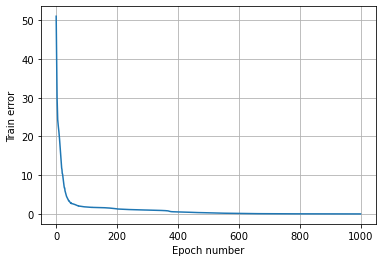

In [29]:
np.random.seed(42)
net = nl.net.newff(nl.tool.minmax(X), [150,3]) #3 because we use 3 bits for each target

#change the activation function for the output layer
net.layers[-1].transf = nl.trans.LogSig() #output layer
net.layers[0].transf = nl.trans.LogSig() #hidden layer
net.layers[1].transf = nl.trans.LogSig() #hidden layer

# train the network
error = net.trainf = nl.train.train_rprop(net,X_train, y_train, epochs=1000, show=100, lr =0.005 ,goal=0.0005)

# Plot results
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show();

In [30]:
#Error from the last epoch
error[-1]

0.0026216894520515325

In [31]:
#Simulate network
out = net.sim(X_test)
out = np.around(out)
#Accuracy
correct=(out == y_test).all(axis=1)
acc=(np.sum(correct)/len(out))*100

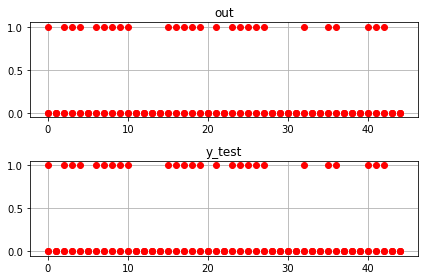

In [32]:
np.array_equal(out, y_test)
False
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out,'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test,'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

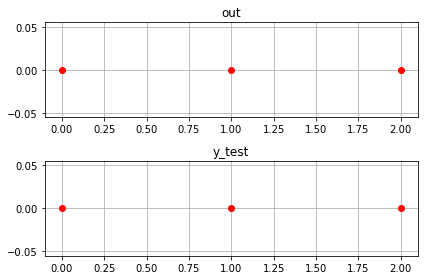

In [33]:
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out[34],'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(y_test[34],'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4> Konstantinos Papi 4720 <h4>